# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
### Introduction of dataset
The data has unique AppointmnetIDs including the timing and the fact whether the patient showed up, and also the detailed information about the reserved patient.

1. Fields related to the timing of appointment
    - ScheduledDay
    - AppointmentDay
2. Fields related to the detailed information of the reserved patient
    - Gender
    - Age
    - Neighbourhood
    - Scholarship
    - Hipertension
    - Diabetes
    - Alcoholism
    - Handcap
    - SMS_received
    
The dependent variable is the field which represents whether the patient showed up for the appointment. We want to analyze what could be relevant independent variables that have effect on the "No-show" factor.

Below are the possible questions which I've come up to explain the "No-show" field.

### Questions
1. Does the age factor have an effect on wheter the patient shows up or not?
2. Does the Scholarhsip factor have an effect on wheter the patient shows up or not?
3. Does the Alcoholism factor have an effect on wheter the patient shows up or not?

<a id='wrangling'></a>
## Data Wrangling

### Libraries used

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from IPython.display import display
%matplotlib inline

### Data sample

In [2]:
# import and investigate overall data
df = pd.read_csv("./noshowappointments-kagglev2-may-2016.csv")

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Potential data issues to check
1. Null values
2. Duplicates
3. Data types
4. Outliers

**1. Checking for Null Values**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**Conclusion**: There are no null values identified.

**2. Checking for duplicate values**

The "AppointmentID" should be unique for each record.

In [4]:
df["AppointmentID"].duplicated().sum()

0

**Conclusion**: There are not duplicates in the "AppointmentID" field. If there were any duplicates, there should have been non-False values for df["AppointmentID"].duplicated(), resulting the sum() to be larger than 0.

**3. Checking for data type issues**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> **Data type issues requiring transformation.**
- "PatientId" and "AppointmentID" should be object data types
- "ScheduledDay" and "AppointmentDay" should be datetime data types, and time elements are not needed for our investigation.

In [6]:
# investigate unique values which could potentially be transformed to boolean data types.
df_investigate = df.iloc[:, 7:]
display(df_investigate.nunique())
display(df_investigate.min())
display(df_investigate.max())

Scholarship     2
Hipertension    2
Diabetes        2
Alcoholism      2
Handcap         5
SMS_received    2
No-show         2
dtype: int64

Scholarship      0
Hipertension     0
Diabetes         0
Alcoholism       0
Handcap          0
SMS_received     0
No-show         No
dtype: object

Scholarship       1
Hipertension      1
Diabetes          1
Alcoholism        1
Handcap           4
SMS_received      1
No-show         Yes
dtype: object

> **Data type issues requiring transformation.**
- The "Scholarship", "Hipertension", "Diabetes", "Alcoholism", "SMS_received", "No-show" fields would be better to analyze if they were boolean data types

**4. Checking for outliers.**

The "Age" field should be approximately ranged betwee 0 to 100(It is less reasonable to think that someone is above 100, and it could be dirty data).

In [7]:
display(df["Age"].min())
display(df["Age"].max())

-1

115

> **Outlier issue requiring transformation.**
- Records with "Age" outside the range from 0 to 100 should be dropped

### Data Cleaning

> **Data type issues requiring transformation(Checked from the Data Wrangling Process).**
- "PatientId" and "AppointmentID" should be object data types
- "ScheduledDay" and "AppointmentDay" should be datetime data types, and time elements are not needed for our investigation.
- The "Scholarship", "Hipertension", "Diabetes", "Alcoholism", "SMS_received", "No-show" fields would be better to analyze if they were boolean data types

In [8]:
# Define function for simple data type changing in a pandas dataframe.
def change_df_datatype(field, datatype):
    df[field] = df[field].astype(datatype)

In [9]:
# Change date types 1
list_to_change_datatype = {"PatientId": "object",
                           "AppointmentID": "object",
                           "Scholarship": "bool",
                           "Hipertension": "bool",
                           "Diabetes": "bool",
                           "Alcoholism": "bool",
                           "SMS_received": "bool"}

for key, value in list_to_change_datatype.items():
    change_df_datatype(key, value)

In [10]:
# Check change data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null object
AppointmentID     110527 non-null object
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null bool
Hipertension      110527 non-null bool
Diabetes          110527 non-null bool
Alcoholism        110527 non-null bool
Handcap           110527 non-null int64
SMS_received      110527 non-null bool
No-show           110527 non-null object
dtypes: bool(5), int64(2), object(7)
memory usage: 8.1+ MB


In [11]:
# Change data types 2
df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"].str[:10], format = '%Y-%m-%d')
df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"].str[:10], format = '%Y-%m-%d')
# df["PatientId"] = df["PatientId"].astype('object')
# df["AppointmentID"] = df["AppointmentID"].astype('object')
# df["Scholarship"] = df["Scholarship"].astype('bool')
# df["Hipertension"] = df["Hipertension"].astype('bool')
# df["Diabetes"] = df["Diabetes"].astype('bool')
# df["Alcoholism"] = df["Alcoholism"].astype('bool')
# df["SMS_received"] = df["SMS_received"].astype('bool')
df["No-show"] = df["No-show"].map({'Yes': True ,'No': False}).astype('bool')

In [12]:
# sample of cleansed data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.98725e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,0,False,False
1,5.58998e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,0,False,False
2,4.26296e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,0,False,False
3,8.67951e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,0,False,False
4,8.84119e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,0,False,False


> **Outlier issue requiring transformation(Checked from the Data Wrangling Process).**
- Records with "Age" outside the range from 0 to 100 should be dropped

In [13]:
df = df[(df["Age"] > 0) & (df["Age"] < 100)]

<a id='eda'></a>
## Exploratory Data Analysis

### Patients from which neighbourhood has the most appointments?

(Single-variable exploration)

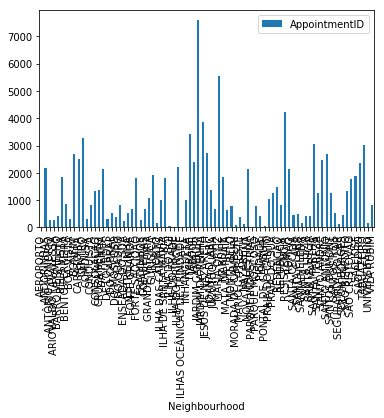

In [14]:
df[["AppointmentID", "Neighbourhood"]].groupby("Neighbourhood").count().plot(kind = 'bar')

In [16]:
max_count = df[["AppointmentID", "Neighbourhood"]].groupby("Neighbourhood").count().max()
df_2 = df[["AppointmentID", "Neighbourhood"]].groupby("Neighbourhood").count()
df_3 = df_2.reset_index()
df_3[df_3["AppointmentID"] == 7586]

,Neighbourhood,AppointmentID
38,JARDIM CAMBURI,7586


**Conclusion**: "JARDIM CAMBURI" has the most appointments(7586).

### Does the age factor have an effect on wheter the patient shows up or not?

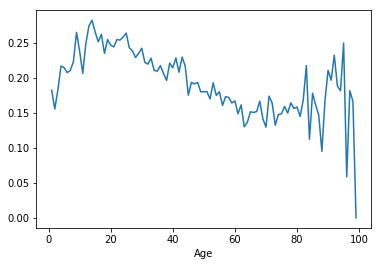

In [17]:
df.groupby("Age")["No-show"].mean().plot(kind = 'line')

**Conclusion**: It sems like the No-show rate declines as the age of the patient rises, but if the patient's age is above 80, the No-show rate seems to increase in some age groups again.

### Does the Scholarhsip factor have an effect on wheter the patient shows up or not?


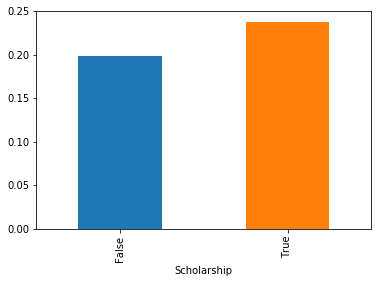

In [18]:
df.groupby("Scholarship")["No-show"].mean().plot(kind = 'bar')

**Conclusion**: People with scholarship tends to no-show more. (We haven't done statistical analytics so we can't assure that this is a difference significant enough)

### Does the Alcoholism factor have an effect on wheter the patient shows up or not?

Alcoholism
False    0.202671
True     0.201488
Name: No-show, dtype: float64

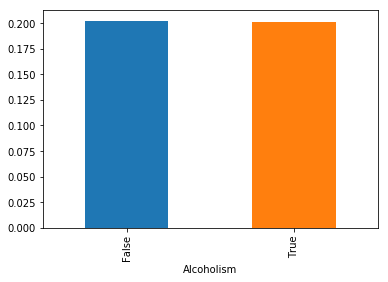

In [19]:
display(df.groupby("Alcoholism")["No-show"].mean())
display(df.groupby("Alcoholism")["No-show"].mean().plot(kind = 'bar'))

**Conclusion**: It seems like that there are about 0.01% difference in the no-show rate between these two groups. (We haven't done statistical analytics so we can't assure that this is a difference significant enough)

<a id='conclusions'></a>
## Conclusions

1. It sems like the No-show rate declines as the age of the patient rises, but if the patient's age is above 80, the No-show rate seems to increase in some age groups again.
2. People with scholarship tends to no-show more. (We haven't done statistical analytics so we can't assure that this is a difference significant enough)
3. It seems like that there are about 0.01% difference in the no-show rate between these two groups. (We haven't done statistical analytics so we can't assure that this is a difference significant enough)

### Limitations
For conclusion 1. & 2., we know that the mean value is differenct among compared groups, but we cannot assure that that difference is significant enough to say that the two groups differ. We'll need more statistical analysis for this.


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [20]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0